**import packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
visa_df=pd.read_csv(r"C:\Users\thaku\Documents\MacBook\Shubham's Stuff\Naresh IT\Data_Science_AI_Omkar Sir\DataFiles\Visadataset.csv")

cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns

In [ ]:
# z_score =

<img class="XqHOTb IGEbUc" alt="Z = \frac{x - \mu}{\sigma}" src="https://www.gstatic.com/education/formulas2/553212783/en/z_score.svg" role="img" data-csiid="7s_CZp3NPL3z4-EP-9CzsAQ_16" data-atf="0">

In [4]:
# Step-1: read prevaialving wage
# Step-2: calculate mean of pwage
# Step-3: calculate std of pwage
# step-4: Numerat :step-1- step2
# step-5: step4/step3
wage_data=visa_df['prevailing_wage']
wage_mean=visa_df['prevailing_wage'].mean()
wage_std=visa_df['prevailing_wage'].std()
nr=wage_data-wage_mean
z_sclaed_wage_data=nr/wage_std
visa_df['z_sclaed_wage_data']=z_sclaed_wage_data

In [5]:
visa_df[['prevailing_wage','z_sclaed_wage_data']]

,prevailing_wage,z_sclaed_wage_data
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


- Compare the values

- We scale the data using z score 

- The index of org minmum value should exactly match with index of z_scaled minimum value

- The index of org maximum value should exactly match with index of z_scaled maximum value

- **idxmax** and **idxmin**

In [10]:
# Prevailing wage minimum id and 
# Prevailing wage maximum id
max_id_wage=visa_df[['prevailing_wage']].idxmax().values[0]
min_id_wage=visa_df[['prevailing_wage']].idxmin().values[0]
print('The maximum value id is:',max_id_wage)
print('The minimum value id is:',min_id_wage)

The maximum value id is: 21077
The minimum value id is: 20575


In [11]:
visa_df[['prevailing_wage']].max()

prevailing_wage    319210.27
dtype: float64

In [16]:
visa_df[['prevailing_wage']].min()

prevailing_wage    2.1367
dtype: float64

In [11]:
visa_df.loc[[max_id_wage,min_id_wage],['prevailing_wage']]

,prevailing_wage
21077,319210.2700
20575,2.1367


In [12]:
max_id_wage=visa_df[['z_sclaed_wage_data']].idxmax().values[0]
min_id_wage=visa_df[['z_sclaed_wage_data']].idxmin().values[0]
print('The maximum value id is:',max_id_wage)
print('The minimum value id is:',min_id_wage)
visa_df.loc[[max_id_wage,min_id_wage],['z_sclaed_wage_data']]

The maximum value id is: 21077
The minimum value id is: 20575


,z_sclaed_wage_data
21077,4.634102
20575,-1.409682


**StandardScalar**

- StanadrdScalar is method to scale the data using z-score

- It is under sklearn package

- Under sklearn , we have a class : **preprocessing**

- Under preprocessing, we have a method: **StandardScalar**

- Read the package

- Save the package

- apply fit transform

In [13]:
visa_df=pd.read_csv(r"C:\Users\thaku\Documents\MacBook\Shubham's Stuff\Naresh IT\Data_Science_AI_Omkar Sir\DataFiles\Visadataset.csv")

In [14]:
# By logic
wage_data=visa_df['prevailing_wage']
wage_mean=visa_df['prevailing_wage'].mean()
wage_std=visa_df['prevailing_wage'].std()
nr=wage_data-wage_mean
z_sclaed_wage_data=nr/wage_std
visa_df['z_sclaed_wage_data']=z_sclaed_wage_data

In [15]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
visa_df['ss_wage_data']=ss.fit_transform(visa_df[['prevailing_wage']])


- Compare 3 columns

    - One is original column : **prevailing_wage**

    - Second columns is developed by logic: **z_sclaed_wage_data**

    - Third column is developed by pacakge: **ss_wage_data**

In [37]:
visa_df[['prevailing_wage','z_sclaed_wage_data','ss_wage_data']]

,prevailing_wage,z_sclaed_wage_data,ss_wage_data
0,592.2029,-1.398510,-1.398537
1,83425.6500,0.169832,0.169835
2,122996.8600,0.919060,0.919079
3,83434.0300,0.169991,0.169994
4,149907.3900,1.428576,1.428604
...,...,...,...
25475,77092.5700,0.049923,0.049924
25476,279174.7900,3.876083,3.876159
25477,146298.8500,1.360253,1.360280
25478,86154.7700,0.221504,0.221509


In [46]:
d=visa_df['prevailing_wage'].values.reshape(-1,1)
ss.fit_transform(d)

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

In [ ]:
# Method-1:
ss.fit_transform(visa_df[['prevailing_wage']])
# Method-2
d=visa_df['prevailing_wage'].values.reshape(-1,1)
ss.fit_transform(d)

**MinMaxScalar**

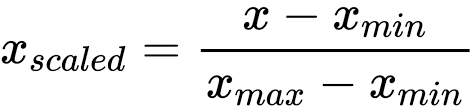

In [ ]:
# read the data
# Develop a normalization data using logic
# step-1: Read the pwage data
# step-2: min value
# step-3: max value
# step-4: nr: step1-step2
# step-5: dr: step3-step2
# step-6: step4/step5

In [16]:
visa_df['min_max_scaled'] = (visa_df['prevailing_wage'] - visa_df['prevailing_wage'].min()) / (visa_df['prevailing_wage'].max() - visa_df['prevailing_wage'].min())

In [17]:
# Using Package
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
mms_scaled_values = MMS.fit_transform(visa_df[['prevailing_wage']])
visa_df['mms_wage_data'] = mms_scaled_values

# our logic
# visa_df['min_max_scaled'] = (visa_df['prevailing_wage'] - visa_df['prevailing_wage'].min()) / (visa_df['prevailing_wage'].max() - visa_df['prevailing_wage'].min())

visa_df[['prevailing_wage','min_max_scaled','mms_wage_data']]

,prevailing_wage,min_max_scaled,mms_wage_data
0,592.2029,0.001849,0.001849
1,83425.6500,0.261345,0.261345
2,122996.8600,0.385312,0.385312
3,83434.0300,0.261371,0.261371
4,149907.3900,0.469616,0.469616
...,...,...,...
25475,77092.5700,0.241505,0.241505
25476,279174.7900,0.874579,0.874579
25477,146298.8500,0.458311,0.458311
25478,86154.7700,0.269895,0.269895


- MinMaxScalar(Normalization) minimum value is 0
- MinMaxScalar(Normalization) maximum value is 1

In [19]:
print(visa_df['min_max_scaled'].min())
print(visa_df['min_max_scaled'].max())

0.0
1.0


In [20]:
print(visa_df['mms_wage_data'].min())
print(visa_df['mms_wage_data'].max())

0.0
0.9999999999999999
